In [1]:
import os
import time
import math
import re
import struct
import traceback
import codecs
import bitstring

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import cv2

from PIL import Image
import IPython.display as display

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'co59-utf8.txt',
 'ETL3C_1',
 'ETL3C_2',
 'ETL3INFO',
 'etl_3_inspect_data.ipynb',
 'README.md']

In [3]:
file_list = [
    'ETL3C_1',
    'ETL3C_2',
]

In [4]:
t56s = '0123456789[#@:>? ABCDEFGHI&.](<  JKLMNOPQR-$*);\'|/STUVWXYZ ,%="!'

def T56(c):
    return t56s[c]

with codecs.open('co59-utf8.txt', 'r', 'utf-8') as co59f:
    co59t = co59f.read()
    
co59l = co59t.split()
CO59 = {}
for c in co59l:
    ch = c.split(':')
    co = ch[1].split(',')
    CO59[(int(co[0]), int(co[1]))] = ch[0]

In [5]:
CO59

{(4, 4): '上',
 (8, 4): '下',
 (12, 4): '不',
 (16, 4): '世',
 (20, 4): '両',
 (24, 4): '面',
 (6, 4): '中',
 (10, 4): '主',
 (14, 4): '義',
 (18, 4): '久',
 (22, 4): '予',
 (26, 4): '算',
 (5, 4): '催',
 (9, 4): '優',
 (13, 4): '児',
 (17, 4): '童',
 (21, 4): '先',
 (25, 4): '光',
 (7, 4): '公',
 (11, 4): '共',
 (15, 4): '内',
 (19, 4): '閣',
 (23, 4): '用',
 (27, 4): '同',
 (4, 6): '争',
 (8, 6): '事',
 (12, 6): '井',
 (16, 6): '文',
 (20, 6): '交',
 (24, 6): '夜',
 (6, 6): '変',
 (10, 6): '高',
 (14, 6): '商',
 (18, 6): '人',
 (22, 6): '入',
 (26, 6): '今',
 (5, 6): '岡',
 (9, 6): '次',
 (13, 6): '風',
 (17, 6): '出',
 (21, 6): '切',
 (25, 6): '列',
 (7, 6): '別',
 (11, 6): '制',
 (15, 6): '割',
 (19, 6): '劇',
 (23, 6): '力',
 (27, 6): '加',
 (4, 5): '合',
 (8, 5): '全',
 (12, 5): '化',
 (16, 5): '付',
 (20, 5): '代',
 (24, 5): '伝',
 (6, 5): '件',
 (10, 5): '任',
 (14, 5): '休',
 (18, 5): '位',
 (22, 5): '何',
 (26, 5): '佐',
 (5, 5): '助',
 (9, 5): '労',
 (13, 5): '働',
 (17, 5): '務',
 (21, 5): '医',
 (25, 5): '半',
 (7, 5): '協',
 (11, 5): '反'

In [6]:
len(CO59.keys())

2304

In [7]:
filename = file_list[0]
filename

'ETL3C_1'

In [8]:
file_stream = bitstring.ConstBitStream(filename=filename)

```
/---[form_c.htm 2001-09.04]-------------------------------------------------------------------


				C-Type Data Format	(ETL3, ETL4, ETL5)


1. File Format (Fixed Record Length without Control Words)

                   <----------> Logical record (2952 bytes) (1byte = 8bits)
     ------------------------------------------------------------------
     |  Sample 1  |  Sample 2  |  Sample 3  |    ....    |  Sample N  |  (No. of records = N)
     ------------------------------------------------------------------


2. Contents of Logical Record (3936 characters = 2952 bytes) (1character = 6bits)

 --------------------------------------------------------------------------------------------
|             |No. of|        |                                                              |
|   Character |Char- |  Type  |            Contents of Logical Record                        |
|   Position  |acters|        |                                                              |
|============================================================================================|
|    1 -    6 |    6 | Integer| Serial Data Number                                           |
|    7 -   12 |    6 | Integer| Serial Sheet Number                                          |
|   13 -   18 |    6 | Binary | JIS Code (Effective bits = Left 8 bits) (JIS X 0201)         |
|I  19 -   24 |    6 | Binary | EBCDIC Code (Effective bits = Left 8 bits)                   |
|D  25 -   28 |    4 | T56Code| 4 Character Code ( ex. "N  0", "A  A", "S  +", "K KA" )      |
|   29 -   30 |    2 | T56Code| Spaces                                                       |
|P  31 -   36 |    6 | Integer| Evaluation of Individual Character Image (0=clean, 1, 2, 3)  |
|a  37 -   42 |    6 | Integer| Evaluation of Character Group (0=clean, 1, 2)                |
|r  43 -   48 |    6 | Integer| Sample Position Y on Sheet                                   |
|t  49 -   54 |    6 | Integer| Sample Position X on Sheet                                   |
|   55 -   60 |    6 | Integer| Male-Female Code ( 1=male, 2=female ) (JIS X 0303)           |
|   61 -   66 |    6 | Integer| Age of Writer                                                |
|   67 -   72 |    6 | Integer| Industry Classification Code (JIS X 0403)                    |
|   73 -   78 |    6 | Integer| Occupation Classification Code (JIS X 0404)                  |
|   79 -   84 |    6 | Integer| Sheet Gatherring Date                                        |
|   85 -   90 |    6 | Integer| Scanning Date                                                |
|   91 -   96 |    6 | Integer| Number of X-Axis Sampling Points                             |
|   97 -  102 |    6 | Integer| Number of Y-Axis Sampling Points                             |
|  103 -  108 |    6 | Integer| Number of Levels of Pixel                                    |
|  109 -  114 |    6 | Integer| Magnification of Scanning Lenz                               |
|  115 -  120 |    6 | Integer| Serial Data Number (old)                                     |
|  121 -  288 |  168 |        | (undefined)                                                  |
|-------------|------|--------|--------------------------------------------------------------|
|  289 - 3936 | 3648 | Packed | 16 Gray Level (4bit/pixel) Image Data                        |
|             |      |        | 72(X-axis size) * 76(Y-axis size) = 5472 pixels              |
 --------------------------------------------------------------------------------------------

------------------------------------------------------------[form_c.htm]---------------------/
```

In [9]:
RECORD_LENGTH = 6 * 3936
skip = 2000
file_stream.pos = skip * RECORD_LENGTH

In [10]:
record = file_stream.readlist(','.join([
    'uint:36', # serial data number - [0]
    'uint:36', # serial sheet number - [1]
    'uint:36', # JIS Code - [2]
    'uint:36', # EBCDIC Code - [3]
    '4*uint:6', # 4 Character Code - [4:8]
    'pad:12', # Spaces
    'uint:36', # Evaluation of Individual Character Image (0=clean, 1, 2, 3) - [8]
    'uint:36', # Evaluation of Character Group (0=clean, 1, 2) - [9]
    'uint:36', # Sample Position Y on Sheet - [10]
    'uint:36', # Sample Position X on Sheet - [11]
    'uint:36', # Male-Female Code (1=male, 2=female) (JIS X 0303) - [12]
    'uint:36', # Age of Writer - [13]
    'uint:36', # Industry Classification Code (JIS X 0403) - [14]
    'uint:36', # Occupation Classification Code (JIS X 0404) - [15]
    'uint:36', # Sheet Gathering Date - [16]
    'uint:36', # Scanning Date - [17]
    'uint:36', # Number of X-Axis Sampling Points - [18]
    'uint:36', # Number of Y-Axis Sampling Points - [19]
    'uint:36', # Number of Levels of Pixel - [20]
    'uint:36', # Magnification of Scanning Lenz - [21]
    'uint:36', # Serial Data Number (old) - [22]
    'pad:1008', # (undefined)
    'bytes:2736', # 16 Gray Level (4bit/pixel) Image Data 72(X-axis size) * 76(Y-axis size) = 5472 pixels - [23]
]))

In [11]:
print(type(record), len(record))
for idx, v in enumerate(record[:-1]):
    print(f'{idx} - {v}')

<class 'list'> 24
0 - 2001
1 - 4001
2 - 20132659200
3 - 56371445760
4 - 17
5 - 16
6 - 16
7 - 34
8 - 0
9 - 0
10 - 3
11 - 0
12 - 1
13 - 26
14 - 3552
15 - 42
16 - 740419
17 - 740420
18 - 72
19 - 76
20 - 16
21 - 133
22 - 400120


In [12]:
''.join(map(T56, record[4:8]))

'A  K'

In [13]:
record_dict = {
    'character': ''.join(map(T56, record[4:8])), # 4 Character Code - [4:8]
    'image_data': record[23], # 16 Gray Level (4bit/pixel) Image Data 72(X-axis size) * 76(Y-axis size) = 5472 pixels - [23]
}

In [14]:
record_dict['character']

'A  K'

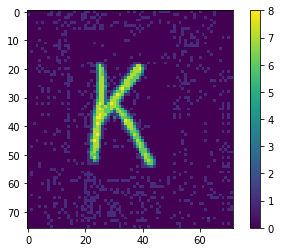

In [15]:
width = 72
height = 76
np_img = np.array(Image.frombytes('F', (width, height), record_dict['image_data'], 'bit', 4))

plt.imshow(np_img)
plt.colorbar()

In [30]:
total_samples = 0
record_count = {}
RECORD_LENGTH = 6 * 3660 # bits

for filename in file_list:

    file_stream = bitstring.ConstBitStream(filename=filename)

    while True:
        try:
            record = file_stream.readlist(','.join([
                'uint:36', # serial data number - [0]
                'uint:36', # serial sheet number - [1]
                'uint:36', # JIS Code - [2]
                'uint:36', # EBCDIC Code - [3]
                '4*uint:6', # 4 Character Code - [4:8]
                'pad:12', # Spaces
                'uint:36', # Evaluation of Individual Character Image (0=clean, 1, 2, 3) - [8]
                'uint:36', # Evaluation of Character Group (0=clean, 1, 2) - [9]
                'uint:36', # Sample Position Y on Sheet - [10]
                'uint:36', # Sample Position X on Sheet - [11]
                'uint:36', # Male-Female Code (1=male, 2=female) (JIS X 0303) - [12]
                'uint:36', # Age of Writer - [13]
                'uint:36', # Industry Classification Code (JIS X 0403) - [14]
                'uint:36', # Occupation Classification Code (JIS X 0404) - [15]
                'uint:36', # Sheet Gathering Date - [16]
                'uint:36', # Scanning Date - [17]
                'uint:36', # Number of X-Axis Sampling Points - [18]
                'uint:36', # Number of Y-Axis Sampling Points - [19]
                'uint:36', # Number of Levels of Pixel - [20]
                'uint:36', # Magnification of Scanning Lenz - [21]
                'uint:36', # Serial Data Number (old) - [22]
                'pad:1008', # (undefined)
                'bytes:2736', # 16 Gray Level (4bit/pixel) Image Data 72(X-axis size) * 76(Y-axis size) = 5472 pixels - [23]
            ]))
        except:
            break
        
        total_samples += 1
        
        record_dict = {
            'character': ''.join(map(T56, record[4:8])), # 4 Character Code - [4:8]
            'image_data': record[23], # 16 Gray Level (4bit/pixel) Image Data 72(X-axis size) * 76(Y-axis size) = 5472 pixels - [23]
        }

#         name = record_dict['character'].strip()
        name = record_dict['character']

        if name in record_count.keys():
            record_count[name] += 1
        else:
            record_count[name] = 1

In [17]:
total_samples

9600

In [18]:
len(record_count.keys())

48

In [31]:
record_count

{'N  0': 200,
 'N  1': 200,
 'N  2': 200,
 'N  3': 200,
 'N  4': 200,
 'N  5': 200,
 'N  6': 200,
 'N  7': 200,
 'N  8': 200,
 'N  9': 200,
 'A  A': 200,
 'A  B': 200,
 'A  C': 200,
 'A  D': 200,
 'A  E': 200,
 'A  F': 200,
 'A  G': 200,
 'A  H': 200,
 'A  I': 200,
 'A  J': 200,
 'A  K': 200,
 'A  L': 200,
 'A  M': 200,
 'A  N': 200,
 'A  O': 200,
 'A  P': 200,
 'A  Q': 200,
 'A  R': 200,
 'A  S': 200,
 'A  T': 200,
 'A  U': 200,
 'A  V': 200,
 'A  W': 200,
 'A  X': 200,
 'A  Y': 200,
 'A  Z': 200,
 'S  $': 200,
 'S  |': 200,
 'S  -': 200,
 'S  *': 200,
 'S  /': 200,
 'S  =': 200,
 'S  (': 200,
 'S  )': 200,
 'S  .': 200,
 'S  ,': 200,
 'S   ': 200,
 "S  '": 200}

In [23]:
csv_filename = 'classes.tsv'
with open(csv_filename, mode='w', encoding='utf-8') as f:
    f.write('class\tnum_samples\n')
    for k in record_count.keys():
        log_str = f'{k}\t{record_count[k]}\n'
        f.write(log_str)
pd_df = pd.read_csv(csv_filename, encoding='utf-8', sep='\t')
pd_df = pd_df.sort_values(['class'])
pd_df.to_csv(csv_filename, encoding='utf-8', index=False, sep='\t')